# New assignment

This assignment is similar in format to the previous one, and involves processing an experimental dataset using `pandas`. The dataset represents words-in-noise confusions collected during the current pandemic using crowdsourcing and is part of a larger study that checks how well crowdsourcing is able to replicate conventional lab studies. 

As before, there are two parts to the assignment, the first one involving producing snippets of code to answer specific questions, the second involving writing a simple GUI. Instructions on handing in are given at the base of this notebook.

The dataset is in the test file `confusions.csv`. The first step is to load this dataset using the code below.

In [388]:
import pandas as pd
data = pd.read_csv('/Users/lauradiazmunozmanzanares/Documents/Universidad UPV/Máster Neurociencia del lenguaje/Scientific Basics/Python/Proyecto final/confusions.csv')
data.head()

,user_id,duration,cond,subj_order,block_order,trial_order,stim,sent,heard
0,34,28,practice,0,0,1,SP_287,prac=prac,x
1,34,28,practice,0,0,2,SP_228,prac=prac,lol
2,34,28,practice,0,0,3,SP_295,prac=prac,estopa
3,34,28,practice,0,0,4,SP_290,muchacho=mucho,miuchcaavho
4,34,28,practice,0,0,5,SP_230,prac=prac,nuestros


Each row of the data represents a single response from a listener. The dataset contains the following columns:

Column name | Meaning
----|----
`user_id`|  a numeric identifier representing the listener who produced this response
`duration` | the time in seconds required for the user to respond to the block
`cond` | the name of the condition
`subj_order`, `block_order`, `trial_order` | not used
`stim` | an identifier representing the specific stimulus
`sent` | a pair of words representing the stimulus (explained below)
`heard` | the response of the user


# Part 1: Answer questions Q1-Q15

Answer questions 1-15 by writing code and showing the solution. In most cases the code required is a single line or a couple of lines. In some cases you need to write a short function.

### Q1. How many responses does the dataset contain?

In [17]:
len(data)

28940

### Q2. How many columns does the table contain?

In [18]:
df_list= list(data)
list(data.columns)

['user_id',
 'duration',
 'cond',
 'subj_order',
 'block_order',
 'trial_order',
 'stim',
 'sent',
 'heard']

In [19]:
print(len(data.columns))

9


### Q3. How many different listeners are in the dataset?

In [21]:
count = 0
different_listeners = []

for i in range (0, len(data['user_id'])):
    
    if data['user_id'][i] not in different_listeners:
        different_listeners.append(data['user_id'][i])
        count += 1
        
print(count)

38


### Q4. Write an expression that creates a set of all conditions

In [26]:
allconditions = []                    
for i in data['cond']:
    if i not in allconditions: 
        allconditions += [i]
print(allconditions)

['practice', 'SSN_s1', 'BMN3_s1', 'BMN1_s1', 'BAB8_s1', 'BAB4_s1', 'SSN_s4', 'BMN3_s4', 'BMN1_s4', 'BAB8_s4', 'BAB4_s4', 'SSN_s2', 'BMN3_s2', 'BMN1_s2', 'BAB8_s2', 'BAB4_s2', 'SSN_s3', 'BMN3_s3', 'BMN1_s3', 'BAB8_s3', 'BAB4_s3']


### Q5. How many rows are there in the `practice` condition?

In [9]:
count = 0

for i in range(0, len(data['cond'])):
    if data['cond'][i] == "practice":
        count += 1
        
print(count)

266


### Q6. Delete all practice rows 

Write an expression to remove all rows representing the practice condition from the dataset. Hint: use an expression like this:

> `confs = confs[???].copy()`

where you replace `???` with an expression that selects just those rows whose condition is not equal to `practice`. Use your answer to Q1 and Q5 to check that the right number of rows have been deleted and your answer to Q4 to check that the `practice` condition no longer appears in the set of conditions. The use of `copy()` ensures that a new dataframe is created and avoids some warnings that you would otherwise see in the answers to later questions.

In [375]:
new_data = data.copy()

new_data.drop (index=new_data[new_data['cond'] == 'practice'].index, inplace= True)
new_data.head()

,user_id,duration,cond,subj_order,block_order,trial_order,stim,sent,heard
7,34,149,SSN_s1,1,1,1,SP_17692,forman=hoy,hoy
8,34,149,SSN_s1,1,1,2,SP_17614,llegaron=llegar,piedad
9,34,149,SSN_s1,1,1,3,SP_1447,doblar=burlar,nublar
10,34,149,SSN_s1,1,1,4,SP_20148,saco=salto,sal
11,34,149,SSN_s1,1,1,5,SP_30375,valle=baño,baño


In [376]:
len(new_data)

28674

In [377]:
allconditions = []                     
for i in new_data['cond']:
    if i not in allconditions: 
        allconditions += [i]
print(allconditions)

['SSN_s1', 'BMN3_s1', 'BMN1_s1', 'BAB8_s1', 'BAB4_s1', 'SSN_s4', 'BMN3_s4', 'BMN1_s4', 'BAB8_s4', 'BAB4_s4', 'SSN_s2', 'BMN3_s2', 'BMN1_s2', 'BAB8_s2', 'BAB4_s2', 'SSN_s3', 'BMN3_s3', 'BMN1_s3', 'BAB8_s3', 'BAB4_s3']


### Q7. Add new columns representing the masker and the speaker.

The condition name consists of the type of masker followed by the speaker identifier, separated by an underscore character e.g. 'BAB4_s1' indicates words spoken by speaker `s1` in the presence of the `BAB4` masker. Your task in this question is to add two columns to the dataframe to represent the masker and speaker. Call the columns `masker` and `speaker`. To add a new column such as `masker` to a dataframe use an expression like:

> `confs['masker'] = ???`

where the `???` might be, for example, a list comprehension expression. 

First, write a simple function to split the condition name into two parts, then use this function in the `???` expression for each new column you add.

Inspect the dataframe to check that the new columns have been added. Note that if you make a mistake at this point you may need to start afresh i.e. re-load the data and re-evaluate your expressions above.

In [378]:
new_data['cond'].str.split('_', expand=True)

,0,1
7,SSN,s1
8,SSN,s1
9,SSN,s1
10,SSN,s1
11,SSN,s1
...,...,...
28935,BAB4,s3
28936,BAB4,s3
28937,BAB4,s3
28938,BAB4,s3


In [379]:
new_data[['masker', 'speaker']] = new_data['cond'].str.split('_', expand=True)
new_data

,user_id,duration,cond,subj_order,block_order,trial_order,stim,sent,heard,masker,speaker
7,34,149,SSN_s1,1,1,1,SP_17692,forman=hoy,hoy,SSN,s1
8,34,149,SSN_s1,1,1,2,SP_17614,llegaron=llegar,piedad,SSN,s1
9,34,149,SSN_s1,1,1,3,SP_1447,doblar=burlar,nublar,SSN,s1
10,34,149,SSN_s1,1,1,4,SP_20148,saco=salto,sal,SSN,s1
11,34,149,SSN_s1,1,1,5,SP_30375,valle=baño,baño,SSN,s1
...,...,...,...,...,...,...,...,...,...,...,...
28935,87,164,BAB4_s3,1,20,27,SP_49180,suenas=ruinas,ruinas,BAB4,s3
28936,87,164,BAB4_s3,1,20,28,SP_1319,vino=chicos,chicos,BAB4,s3
28937,87,164,BAB4_s3,1,20,29,SP_44206,tripas=pipas,pipas,BAB4,s3
28938,87,164,BAB4_s3,1,20,30,SP_24023,concierto=cierto,desierto,BAB4,s3


### Q8. Create new columns representing the stimulus and original confusion

Each entry in the `sent` column consistents of a string with two parts separated by an equals sign. The element on the left of the equals represents the stimulus word that was mixed with the masker; the element on the right is what the majority of listeners reported as hearing during the lab test. We refer to this as the original confusion. For example, `vino=chicas` means that in the lab test the majority of listeners heard the target word `vino` (when mixed with noise) as `chicas`. Using a similar approach as in your answer to Q7, create two new columns called `target` and `confusion` containing the left and right hand sides of the `sent` column.

Start by modifying the function you wrote in your answer to Q7 by adding an argument representing the character to split on, and use this modified function in your answer to Q8.

In [380]:
new_data['sent'].str.split('=', expand=True)

,0,1
7,forman,hoy
8,llegaron,llegar
9,doblar,burlar
10,saco,salto
11,valle,baño
...,...,...
28935,suenas,ruinas
28936,vino,chicos
28937,tripas,pipas
28938,concierto,cierto


In [381]:
new_data[['target', 'confusion']] = new_data['sent'].str.split('=', expand=True)
new_data

,user_id,duration,cond,subj_order,block_order,trial_order,stim,sent,heard,masker,speaker,target,confusion
7,34,149,SSN_s1,1,1,1,SP_17692,forman=hoy,hoy,SSN,s1,forman,hoy
8,34,149,SSN_s1,1,1,2,SP_17614,llegaron=llegar,piedad,SSN,s1,llegaron,llegar
9,34,149,SSN_s1,1,1,3,SP_1447,doblar=burlar,nublar,SSN,s1,doblar,burlar
10,34,149,SSN_s1,1,1,4,SP_20148,saco=salto,sal,SSN,s1,saco,salto
11,34,149,SSN_s1,1,1,5,SP_30375,valle=baño,baño,SSN,s1,valle,baño
...,...,...,...,...,...,...,...,...,...,...,...,...,...
28935,87,164,BAB4_s3,1,20,27,SP_49180,suenas=ruinas,ruinas,BAB4,s3,suenas,ruinas
28936,87,164,BAB4_s3,1,20,28,SP_1319,vino=chicos,chicos,BAB4,s3,vino,chicos
28937,87,164,BAB4_s3,1,20,29,SP_44206,tripas=pipas,pipas,BAB4,s3,tripas,pipas
28938,87,164,BAB4_s3,1,20,30,SP_24023,concierto=cierto,desierto,BAB4,s3,concierto,cierto


Before going any further you might want to tidy up the dataframe by removing various columns that are not going to be used. You can do so like this:

In [187]:
new_data.drop(columns={'subj_order', 'block_order', 'trial_order', 'sent', 'cond'}, inplace=True)


### Q9. Which confusions agree with the original confusions?

Create a new column called `agree` that contains `True` when a response is the same as the original confusion, and `False` otherwise. **Your comparison should be case-insensitive**. 

Hints: (1) write a function to perform the agreement check; (2) use the `str` function to handle any entries that are not strings.

In [242]:
h= new_data ['heard']
c= new_data ['confusion']

In [243]:
new_data['agree'] = h == c
new_data

,user_id,duration,stim,heard,masker,speaker,target,confusion,agree
7,34,149,SP_17692,hoy,SSN,s1,forman,hoy,True
8,34,149,SP_17614,piedad,SSN,s1,llegaron,llegar,False
9,34,149,SP_1447,nublar,SSN,s1,doblar,burlar,False
10,34,149,SP_20148,sal,SSN,s1,saco,salto,False
11,34,149,SP_30375,baño,SSN,s1,valle,baño,True
...,...,...,...,...,...,...,...,...,...
28935,87,164,SP_49180,ruinas,BAB4,s3,suenas,ruinas,True
28936,87,164,SP_1319,chicos,BAB4,s3,vino,chicos,True
28937,87,164,SP_44206,pipas,BAB4,s3,tripas,pipas,True
28938,87,164,SP_24023,desierto,BAB4,s3,concierto,cierto,False


### Q10. What proportion of responses agree with the original confusion?

Across the entire dataset, what proportion of responses agree with the original confusion?

In [267]:
len(new_data['agree'])

28674

In [263]:
agree_ = 0

for boolean in new_data['agree']:
    if boolean == True:
        agree_ += 1
agree_

12165

In [272]:
percent = agree_ / len(new_data ['agree']) * 100
print("{:.2f}".format(percent))

42.43


### Q11. How often were the most frequently presented stimuli heard? 

Hint: you might like to use `Counter` from the `collections` module; see the section of the lecture notes dealing with modes.

In [275]:
from collections import Counter

In [284]:
counter = Counter(new_data['stim'])
print(counter.most_common(5))      #the stimuli were heard 38 times

[('SP_17692', 38), ('SP_17614', 38), ('SP_1447', 38), ('SP_20148', 38), ('SP_30375', 38)]


### Q12. What proportion of responses agree with the original confusion for each masker type?

In [339]:
df = new_data[new_data['agree'] == True]
df

,user_id,duration,stim,heard,masker,speaker,target,confusion,agree
7,34,149,SP_17692,hoy,SSN,s1,forman,hoy,True
11,34,149,SP_30375,baño,SSN,s1,valle,baño,True
12,34,149,SP_15797,pista,SSN,s1,dijiste,pista,True
13,34,149,SP_4260,sueño,SSN,s1,suena,sueño,True
16,34,149,SP_17427,sufrir,SSN,s1,sufrido,sufrir,True
...,...,...,...,...,...,...,...,...,...
28934,87,164,SP_13178,actor,BAB4,s3,lector,actor,True
28935,87,164,SP_49180,ruinas,BAB4,s3,suenas,ruinas,True
28936,87,164,SP_1319,chicos,BAB4,s3,vino,chicos,True
28937,87,164,SP_44206,pipas,BAB4,s3,tripas,pipas,True


In [351]:
proportion_masker= (df['masker'].value_counts()/df['masker'].count())*100
proportion_masker

BMN1    28.244965
BMN3    23.222359
SSN     21.052199
BAB4    18.060008
BAB8     9.420469
Name: masker, dtype: float64

### Q13. Produce a bar chart showing the information in the answer to Q12.

Hint: use `seaborn`

In [307]:
import seaborn as sns

<AxesSubplot:>

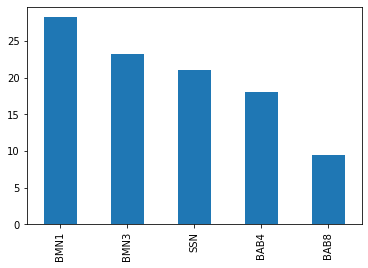

In [324]:
proportion_masker.plot(kind='bar')

### Q14. Graph the effect of both masker and speaker on the proportion of agreement

Hint: investigate the use of `catplot` in `seaborn` (other solutions are acceptable).

In [352]:
proportion_speaker= (df['speaker'].value_counts()/df['speaker'].count())*100
proportion_speaker

s1    29.009453
s2    27.143444
s4    23.526510
s3    20.320592
Name: speaker, dtype: float64

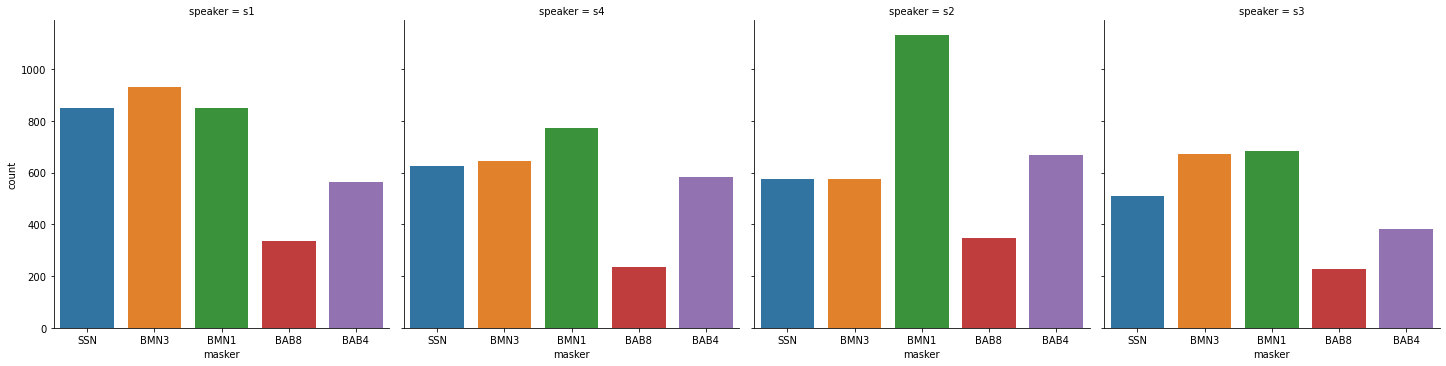

In [366]:
sns.catplot(x='masker', data=df, kind='count',
               col= 'speaker')

### Q15. Write a function that shows all confusions for a specific target word

The function takes as input the dataframe and a target word, and returns a set of all confusions from the crowdsourcing experiment (not the original confusions). **Demonstrate your answer by choosing three different target words and showing the result you get in each case**.

In [406]:

    sentence = input('Type a sentence to synthesise: \n ')
    results = []
    for i, row in new_data.iterrows():
        if row['target'] == sentence:
            results.append(row['heard'])
    print(results) 
    print('\n')


Type a sentence to synthesise: 
 forman
['hoy', 'hoy', 'x', 'hoy', 'x', 'folio', 'poni', 'joya', 'Hoy', 'pollo', 'oro', 'hoy', 'hoy', 'hoy', 'hoy', 'hoy', 'hoy', 'hola', 'olla', 'hoy', 'por', 'hoy', 'hoy', 'hoy', 'x', 'por', 'bol', 'oya', 'hoy', 'hoy', 'hoy', 'hoy', 'hoy', 'hoy', 'hoy', 'hoy', 'fobia', 'voy']


Type a sentence to synthesise: 
 dijiste
['pista', 'pista', 'x', 'hiciste', 'lista', 'pista', 'pista', 'pista', 'Pista', 'registro', 'pista', 'pisto', 'registro', 'fiesta', 'pista', 'x', 'registro', 'cristal', 'X', 'cisne', 'cisne', 'x', 'registrar', 'pista', 'x', 'digiste', 'quiste', 'registro', 'x', 'x', 'dijiste', 'quisto', 'dijiste', 'dijiste', 'registro', 'dijiste', 'pista', 'X']


Type a sentence to synthesise: 
 valle
['baño', 'fallos', 'baño', 'río', 'baño', 'baños', 'ba', 'apaños', 'baño', 'baños', 'baño', 'baño', 'baños', 'baño', 'Baño', 'baños', 'país', 'valla', 'valle', 'puentes', 'baño', 'valles', 'baño', 'baños', 'baño', 'baño', 'baño', 'baño', 'x', 'bailes', 'x', 

# Part 2: Build a GUI to display confusions

Use your solutions to some of the questions above to produce a simple GUI that allows a user to type in a target word, and as a result displays all the confusions that occurred in response to that target word in the crowdsourcing experiment.

70% of the assessment comes from your answers to part 1 and 30% from part 2. 

### Hand in

Hand in a zip file (not rar or any other format) that contains exactly three files:

1. This notebook
2. A python program that implements the GUI for part 2.
3. The `confusions.csv` file that you were sent.